In [2]:
import pandas as pd
file = pd.read_csv("heart.csv") 

In [3]:

print(file.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [4]:

print(file.describe())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [5]:


print(file.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
# Fill missing values with the mean of the column
file.fillna(file.mean(), inplace=True)



In [7]:

df = pd.get_dummies(file, drop_first=True)

print(df.head())


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0

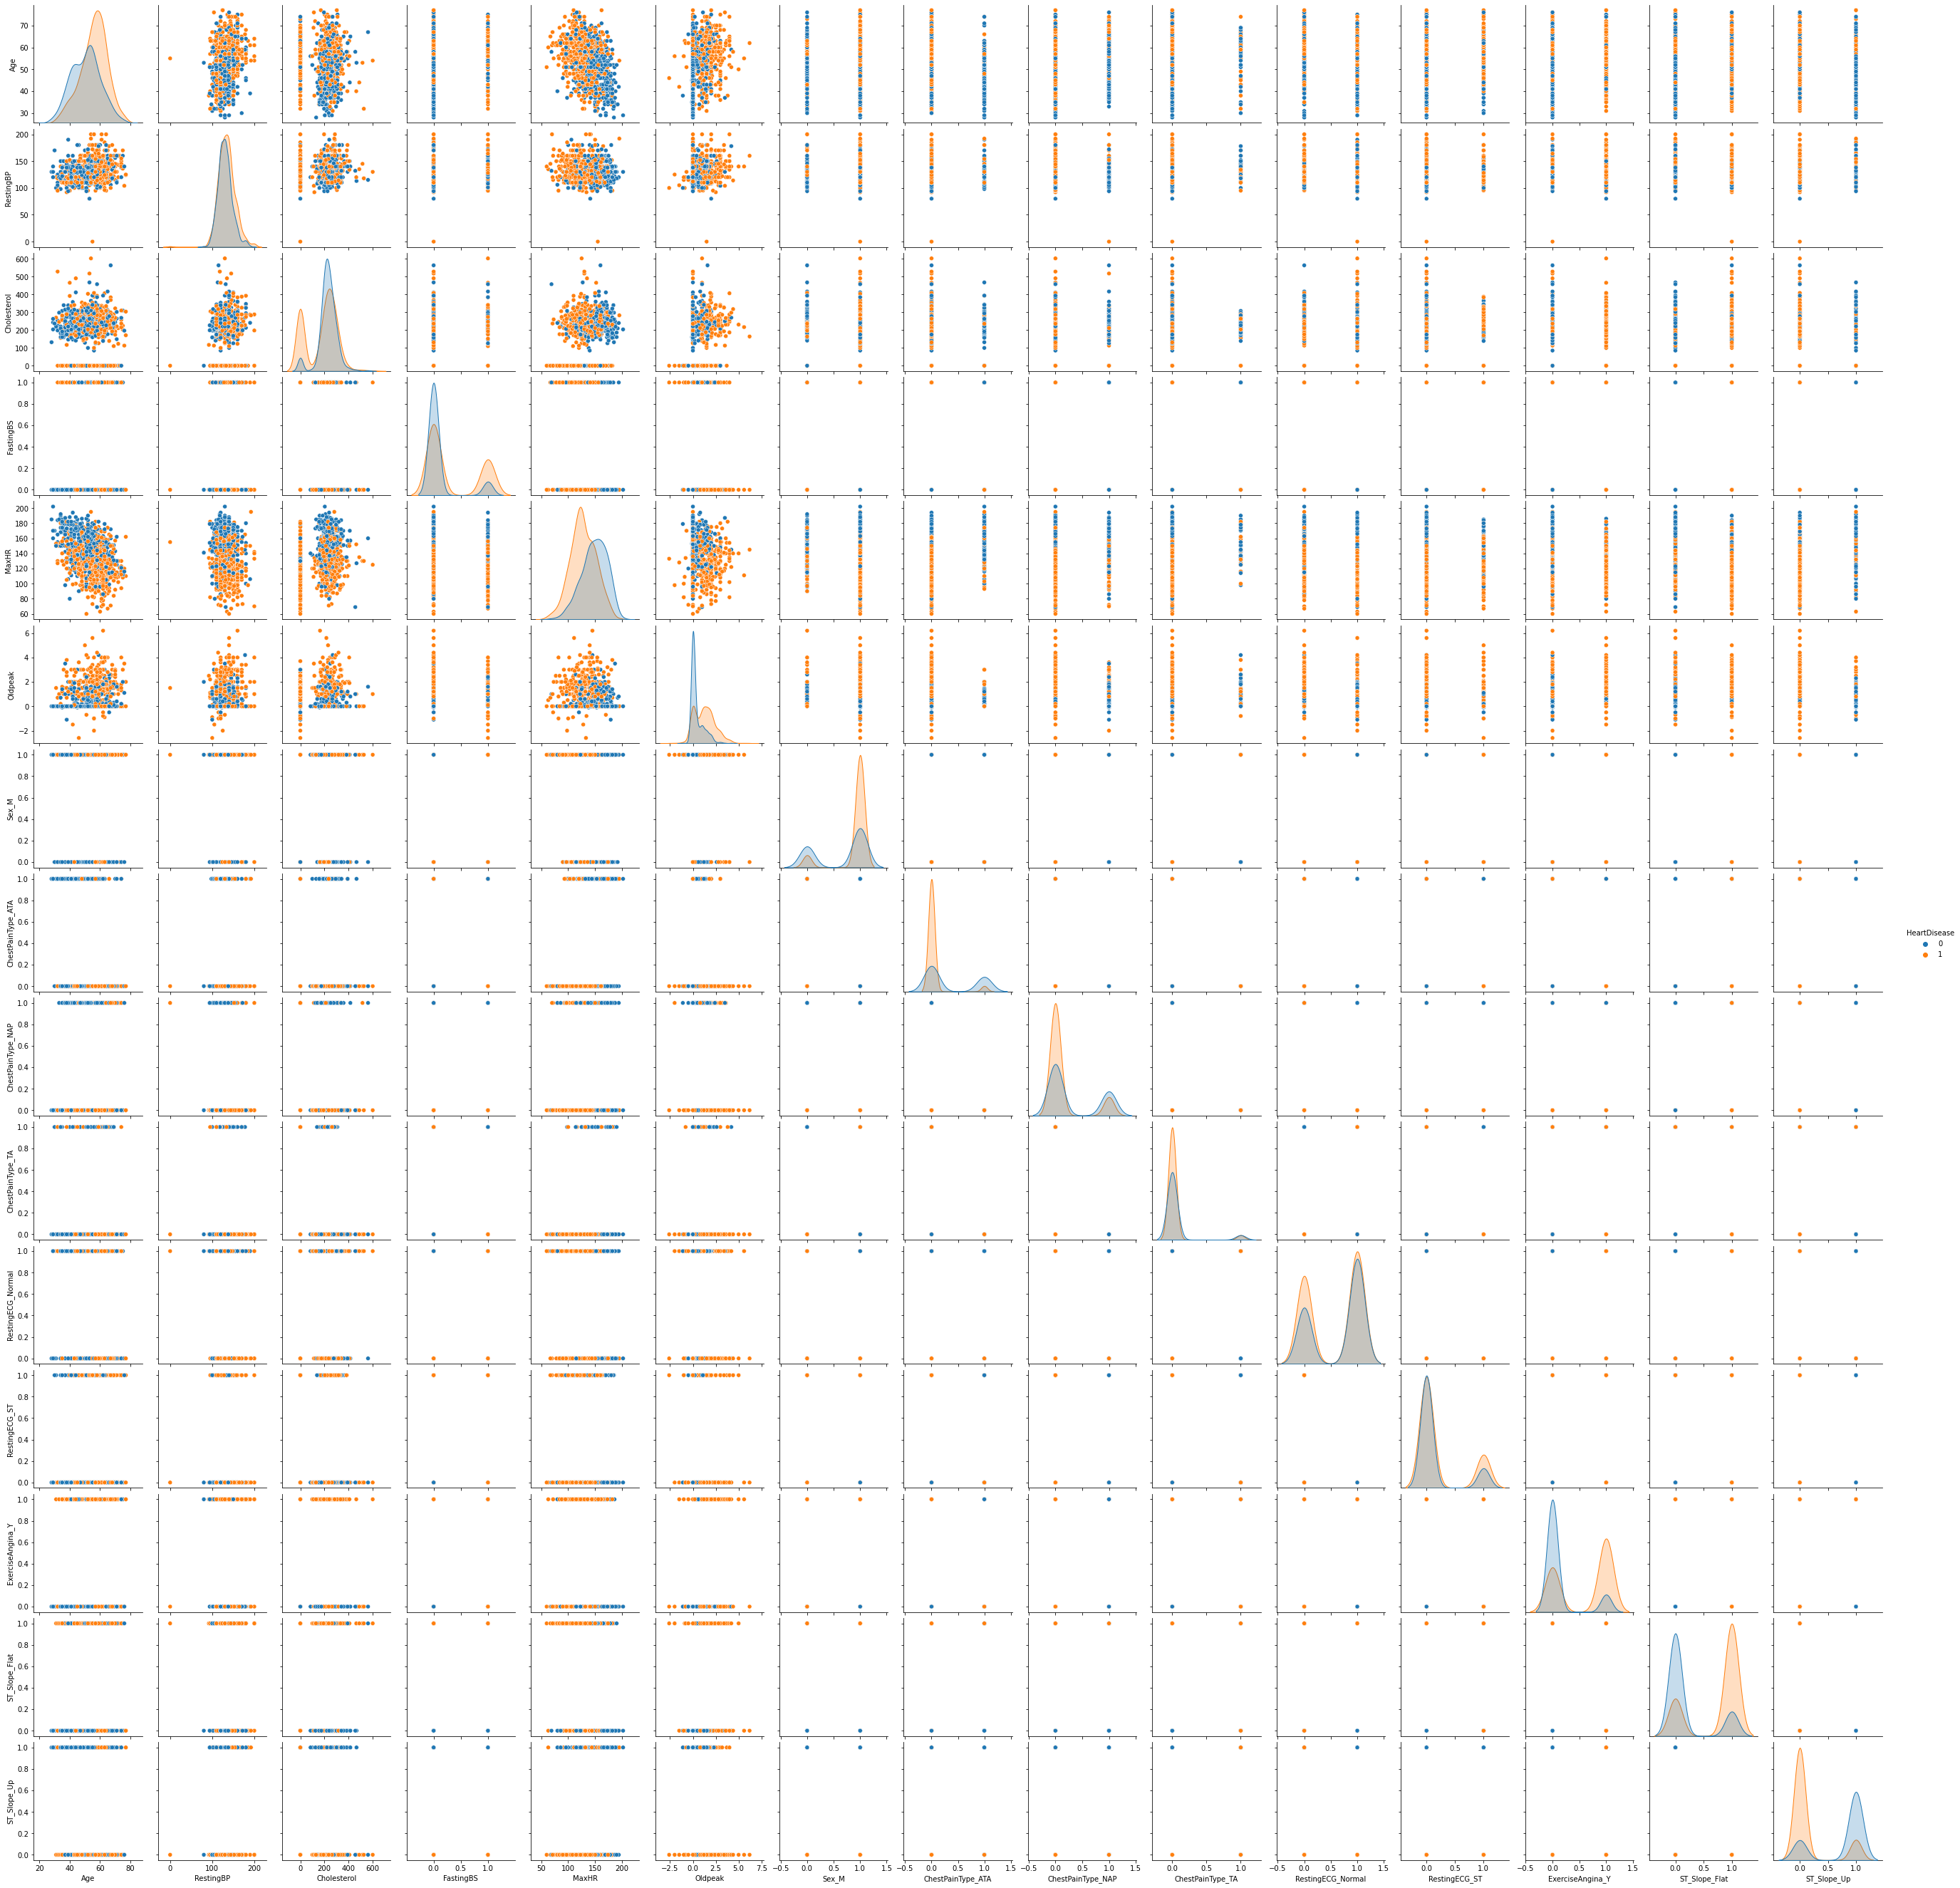

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, hue='HeartDisease') 
plt.show()


In [28]:
feature_columns = [
    'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 
    'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG_Normal', 
    'RestingECG_ST', 'MaxHR', 'ExerciseAngina_Y', 'Oldpeak', 
    'ST_Slope_Flat', 'ST_Slope_Up'
]
target_column = 'HeartDisease'

X = df[feature_columns]
y = df[target_column]
y.shape

(918,)

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Display the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))


Training set size: 642
Validation set size: 138
Testing set size: 138


In [20]:

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=100)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.8478


In [21]:
from sklearn.metrics import accuracy_score



accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.8478260869565217


In [22]:
from sklearn.metrics import recall_score



recall = recall_score(y_test, y_pred)

print("Recall Score:", recall)

Recall Score: 0.868421052631579


In [23]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.8627450980392157


ROC-AUC Score: 0.8455008488964346


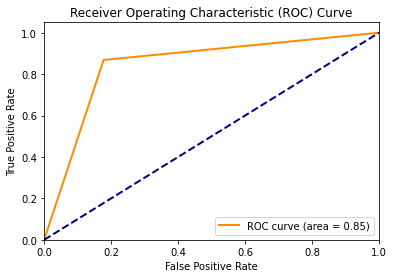

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC-AUC Score
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.metrics import f1_score



# Calculate F1 scores using different averaging methods
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("Macro Averaged F1 Score:", f1_macro)
print("Micro Averaged F1 Score:", f1_micro)
print("Weighted Averaged F1 Score:", f1_weighted)

Macro Averaged F1 Score: 0.8460066953610714
Micro Averaged F1 Score: 0.8478260869565218
Weighted Averaged F1 Score: 0.8477047941834919
